In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, time,json
import matplotlib.pyplot as plt

from scipy import stats
import scipy
scipy.__version__

FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['insurance - insurance.csv']

Questions 

    Q1. Do smokers have higher insurance charges than non-smokers?
    Q2. Are men more likely to smoke than women?
    Q3. Do different regions have different charges, on average?
    
    

#### Null Hypothesis:
Smokers and non-smokers alike do not have significant insurance charges. 

#### Alternate Hypothesis:
Smokers do have higher insurance charges than non-smokers.


#### Significance Level(Alpha):
alpha = .05


In [2]:
# load dataframe 
filename = ('Data/insurance - insurance.csv')
df = pd.read_csv(filename)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# check the statistics of the data 
df.describe().round()

,age,bmi,children,charges
count,1338.0,1338.0,1338.0,1338.0
mean,39.0,31.0,1.0,13270.0
std,14.0,6.0,1.0,12110.0
min,18.0,16.0,0.0,1122.0
25%,27.0,26.0,0.0,4740.0
50%,39.0,30.0,1.0,9382.0
75%,51.0,35.0,2.0,16640.0
max,64.0,53.0,5.0,63770.0


In [4]:
# check for duplicates 
df.duplicated().sum()

1

In [5]:
# drop duplicates 
df.drop_duplicates(keep=False, inplace=True)

In [6]:
# checking for drop duplicates 
df.duplicated().sum()

0

### Q1 -  Do smokers have higher insurance charges than non-smokers?


In [7]:
df['smoker'].value_counts()

no     1062
yes     274
Name: smoker, dtype: int64

In [8]:
df['charges'].value_counts()

16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1336, dtype: int64

In [9]:
# separated non smokers
df['smoker_no']=df['smoker'].str.contains('no')
df['smoker_no'].value_counts(normalize=True)

True     0.79491
False    0.20509
Name: smoker_no, dtype: float64

In [10]:
# saving list of columns for each group 
insured_cols = ['smoker_no', 'charges']

In [11]:
# non smokers in separate variable 
yes_smoke = df.loc[df['smoker_no']==False, insured_cols]
yes_smoke

,smoker_no,charges
0,False,16884.92400
11,False,27808.72510
14,False,39611.75770
19,False,36837.46700
23,False,37701.87680
...,...,...
1313,False,36397.57600
1314,False,18765.87545
1321,False,28101.33305
1323,False,43896.37630


In [12]:
# non smokers in separate variable 
not_smoker = df.loc[df['smoker_no']==True, insured_cols]
not_smoker

,smoker_no,charges
1,True,1725.55230
2,True,4449.46200
3,True,21984.47061
4,True,3866.85520
5,True,3756.62160
...,...,...
1332,True,11411.68500
1333,True,10600.54830
1334,True,2205.98080
1335,True,1629.83350


In [13]:
## visualizing both groups
plot_df = pd.concat([yes_smoke,not_smoker])
plot_df

,smoker_no,charges
0,False,16884.9240
11,False,27808.7251
14,False,39611.7577
19,False,36837.4670
23,False,37701.8768
...,...,...
1332,True,11411.6850
1333,True,10600.5483
1334,True,2205.9808
1335,True,1629.8335


<AxesSubplot:xlabel='smoker_no', ylabel='charges'>

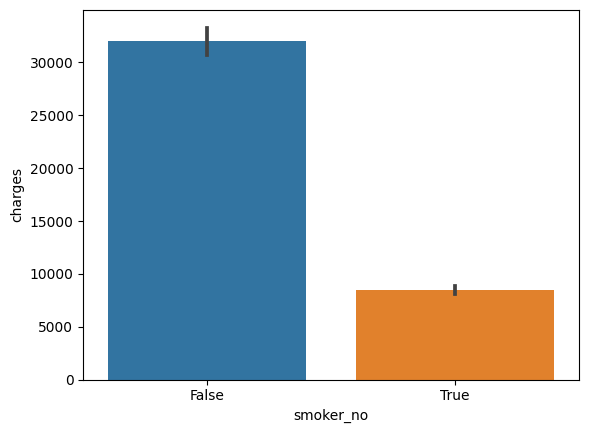

In [14]:
# Visual
sns.barplot(data=plot_df, x='smoker_no', y='charges')

Non-smokers insurance charges are significantly higher than those who smoke. 

### Testing Assumptions

In [15]:
ntsmker_group = not_smoker['charges']
smker_group = yes_smoke['charges']
ntsmker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1062, dtype: float64

In [16]:
# checking smoker group for outliers
smoker_outliers = np.abs(stats.zscore(smker_group)) > 3

## how many outliers?
smoker_outliers.sum()

0

In [17]:
len(smker_group)

274

In [18]:
# checking the non smoker groups for outliers 
ntsmoker_outliers = np.abs(stats.zscore(ntsmker_group)) > 3

# how many outliers
ntsmoker_outliers.sum()

24

In [19]:
# removing outliers from non smoker group 
non_smoker_clean = ntsmker_group[ntsmoker_outliers==False]
non_smoker_clean

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1038, dtype: float64

- All outliers have been removed from both the non-smoker and smoker groups.

### Test for Normality 

In [20]:
# Check smoker group for normality
stats.normaltest(smker_group)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [21]:
len(smker_group)

274

In [22]:
# Check non smoker group for normality
stats.normaltest(non_smoker_clean)

NormaltestResult(statistic=163.61477476065267, pvalue=2.961440980038499e-36)

In [23]:
len(non_smoker_clean)

1038

In [24]:
# Testing for equal variances 
## Use Levene's test for equal variance 
result = stats.levene(smker_group, non_smoker_clean)
result

LeveneResult(statistic=520.7967321643627, pvalue=2.504916336671298e-97)

In [25]:
## Use an if-else to help interpret the p-value
result.pvalue < .05

True

- Both smoker and non-smoker groups are not normally distributed. The p-value for both groups returns true. Which means the null hypothesis test is rejected. 

####  Final Hypothesis test 

In [26]:
final_rst= stats.ttest_ind(smker_group, non_smoker_clean, equal_var=False)
final_rst

Ttest_indResult(statistic=33.71461284097539, pvalue=2.8907227189751836e-104)

In [27]:
final_rst.pvalue <.00000001

True

In [28]:
# calculate the group means
smoker_mean=smker_group.mean().round(2)
smoker_mean

32050.23

In [29]:
nonsmoker_mean=non_smoker_clean.mean().round(2)
nonsmoker_mean

7952.0

Q1. Do smokers have higher insurance charges than non-smokers?
- The average insurance charge for non-smokers ar less than smokers as seen in cells 34 & 35. 

In [32]:
# Do men and women differ when it comes to smoking?
df.groupby(['smoker', 'sex']).mean()

age        bmi  children       charges  smoker_no
smoker sex                                                            
no     female  39.691042  30.539525  1.087751   8762.297300        1.0
       male    39.139806  30.771282  1.097087   8112.244116        1.0
yes    female  38.608696  29.608261  1.008696  30678.996276        0.0
       male    38.446541  31.504182  1.188679  33042.005975        0.0

Q2. Are men more likely to smoke than women?

- Men are not more likely to smoke than women the variance between the smokers mean is small. 

In [35]:
df.groupby(['region', 'charges']).mean()

age     bmi  children  smoker_no
region    charges                                       
northeast 1694.79640   18.0  15.960       0.0        1.0
          1702.45530   18.0  21.470       0.0        1.0
          1704.56810   18.0  22.990       0.0        1.0
          1704.70015   18.0  23.085       0.0        1.0
          1705.62450   18.0  23.750       0.0        1.0
...                     ...     ...       ...        ...
southwest 47928.03000  64.0  33.800       1.0        0.0
          48173.36100  60.0  39.900       0.0        0.0
          48824.45000  63.0  37.700       0.0        0.0
          51194.55914  28.0  36.400       1.0        0.0
          52590.82939  60.0  32.800       0.0        0.0

[1336 rows x 4 columns]

Q3. Do different regions have different charges, on average?

- Yes, different region have different charges on average. Southwest region seems to be slightly higher than northeast. 

**Final Conclusion**

Based on the p-value being less than 0.05 the null hypothesis is rejected. And the alternative hypothesis is supported with the equal variance test and normality test.  

<AxesSubplot:xlabel='smoker', ylabel='charges'>

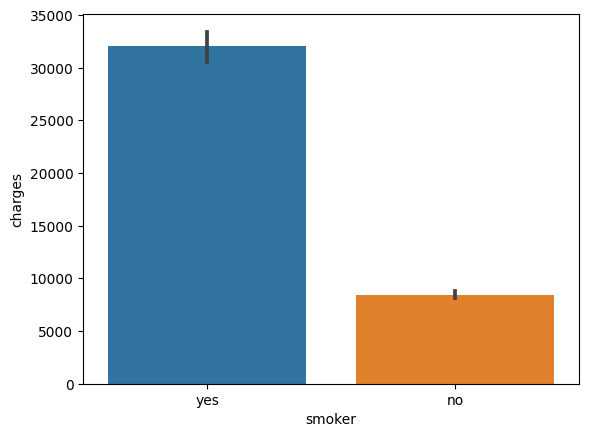

In [31]:
# results visualization 
sns.barplot(data=df, x='smoker', y='charges')